In [1]:
import pandas as pd
from sqlalchemy import create_engine
from pandas_profiling import ProfileReport
import os
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
filename = 'C:/Users/user/Desktop/accepted_2007_to_2018Q4.csv'

In [3]:
csv_database = create_engine('sqlite:///csv_database.db') #using sqlite server to conserve memory for massive 2.5gb file

In [4]:
chunksize = 200000
i = 0
j = 1
for df in pd.read_csv(filename, chunksize=chunksize, iterator=True):
      df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) 
      df.index += j
      i+=1
      df.to_sql('devlendingclub26', csv_database, if_exists='append')
      j = df.index[-1] + 1

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,19,59,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,19,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interac

In [6]:
#dfsaved = pd.read_sql_query('SELECT * FROM devlendingclub26', csv_database)

In [5]:
df = pd.read_sql_query('SELECT * FROM devlendingclub26', csv_database)

In [6]:
dtypewarningcols = [19,59,118,19,118,129,130,131,134,135,136,139,145,146,147,19,59,118,129,130,131,134,135,136,139,145,146,147,129,130,131,134,135,136,139,145,146,147,19,49,59,118,129,130,131,134,135,136,139,19,49,59,129,130,131,134,135,136,139]

In [7]:
dftypewarningcols = pd.DataFrame(dtypewarningcols)
dftypewarningcols = dftypewarningcols.drop_duplicates().sort_values(by=0)
dftypewarningcols[0].tolist()

[19, 49, 59, 118, 129, 130, 131, 134, 135, 136, 139, 145, 146, 147]

In [8]:
df.shape

(2260701, 152)

In [68]:
df.head()

,index,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,1,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,2,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,3,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,4,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,5,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [9]:
df.iloc[:, [19, 49, 59, 118, 129, 130, 131, 134, 135, 136, 139, 145, 146, 147]].isna().sum() #dropped
#how to see rows will all missing data
#keep last payment

url                               33
last_pymnt_amnt                   33
dti_joint                    2139995
sec_app_fico_range_high      2152680
hardship_flag                     33
hardship_type                2249784
hardship_reason              2249784
hardship_amount              2249784
hardship_start_date          2249784
hardship_end_date            2249784
hardship_dpd                 2249784
debt_settlement_flag              33
debt_settlement_flag_date    2226455
settlement_status            2226455
dtype: int64

In [10]:
df['debt_settlement_flag'].unique()
#.apply(lambda x: format(x, 'f')) 
# supress scientific notation 

array(['N', 'Y', None], dtype=object)

In [11]:
#last_pymnt_amnt object to float
df['last_pymnt_amnt'] = df['last_pymnt_amnt'].astype(float)

In [12]:
#dropping columns keepings last payment, hardship flag, and debt settlement_flag
#droppedcols = [49, 59, 118, 130, 131, 134, 135, 136, 139, 146, 147]
df = df.drop(df.columns[[49, 59, 118, 130, 131, 134, 135, 136, 139, 146, 147]], axis = 1)
#how to drop columns w/o quotes / what does inplace = True do

In [16]:
df.shape

(2260701, 141)

In [17]:
mis_val = df.isnull().sum()
mis_val_percent = 100 * df.isnull().sum() / len(df)

In [37]:
mis_val_percent[mis_val_percent >= 90].sort_values(ascending = False)

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
deferral_term                                  99.517097
hardship_status                                99.517097
hardship_last_payment_amount                   99.517097
hardship_payoff_balance_amount                 99.517097
hardship_loan_status                           99.517097
hardship_length                                99.517097
payment_plan_start_date                        99.517097
settlement_percentage                          98.485160
settlement_term                                98.485160
settlement_date                                98.485160
settlement_amount                              98.485160
sec_app_mths_since_last_major_derog            98.410139
sec_app_revol_util                             95.303050
revol_bal_joint                                95.221836
sec_app_fico_range_low                         95.221792
sec_app_earliest_cr_line       

In [39]:
mis_val_percent_index = mis_val_percent[mis_val_percent >= 90].index
mis_val_percent_index #indexes with 90% of data missing

In [45]:
df = df.drop(df[mis_val_percent_index], axis = 1)

In [47]:
df.shape

(2260701, 113)

In [50]:
(100 * df.isnull().sum() / len(df)).sort_values(ascending = False)

mths_since_last_record            84.113069
mths_since_recent_bc_dlq          77.011511
mths_since_last_major_derog       74.309960
mths_since_recent_revol_delinq    67.250910
next_pymnt_d                      59.509993
                                    ...    
initial_list_status                0.001460
revol_bal                          0.001460
fico_range_high                    0.001460
id                                 0.000000
index                              0.000000
Length: 113, dtype: float64

In [55]:
df2 = df

In [64]:
df2 = df2.drop(df2.columns[[0]], axis = 1) #dropping extra index columns

In [65]:
df2.iloc[:,[0]]

,loan_amnt
0,3600.0
1,24700.0
2,20000.0
3,35000.0
4,10400.0
...,...
2260696,40000.0
2260697,24000.0
2260698,14000.0
2260699,NaN


In [67]:
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [119]:
df2.iloc[:, : 10]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years
...,...,...,...,...,...,...,...,...,...,...
2260696,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years
2260697,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years
2260698,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years
2260699,NaN,NaN,NaN,None,NaN,NaN,None,None,None,None


In [136]:
df2_all_missing_index = df2[df2.isnull().all(axis=1)].index

In [137]:
df2_all_missing_index

Int64Index([ 421095,  421096,  528961,  528962,  651664,  651665,  749520,
             749521,  877716,  877717,  983169,  983170, 1117058, 1117059,
            1352689, 1352690, 1481103, 1481104, 1611877, 1611878, 1651665,
            1654415, 1654416, 1751196, 1751197, 1939379, 1939380, 2038501,
            2038502, 2157151, 2157152, 2260699, 2260700],
           dtype='int64')

In [138]:
df3 = df2.drop(df2_all_missing_index)

In [142]:
df3.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
2260694,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,C1,Unit Operator,7 years,...,NaN,0.0,0.0,102517.0,104422.0,0.0,52017.0,N,Cash,N
2260695,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,Database Administrator,10+ years,...,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0,N,Cash,N
2260696,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,...,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,N,Cash,N
2260697,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,...,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Cash,Y
2260698,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,...,50.0,0.0,0.0,163804.0,44215.0,9500.0,34169.0,N,Cash,N


In [143]:
df3['term'] = df3['term'].str.replace(' months','')

In [146]:
df3['term'] = df3['term'].astype(str).astype(int)

In [148]:
df3['term'].dtypes

dtype('int32')

Text(0, 0.5, 'Data type')

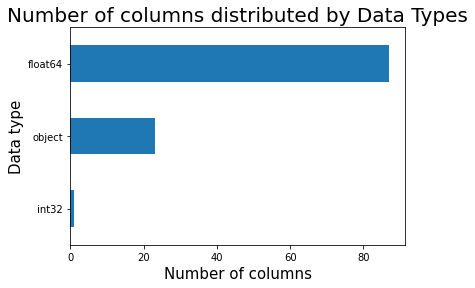

In [150]:
df3.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [151]:
df3.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

grade                         7
sub_grade                    35
emp_title                512694
emp_length                   11
home_ownership                6
verification_status           3
issue_d                     139
loan_status                   9
pymnt_plan                    2
url                     2260668
purpose                      14
title                     63155
zip_code                    956
addr_state                   51
earliest_cr_line            754
initial_list_status           2
last_pymnt_d                136
next_pymnt_d                106
last_credit_pull_d          141
application_type              2
hardship_flag                 2
disbursement_method           2
debt_settlement_flag          2
dtype: int64

In [154]:
df4 = df3.drop(['url'], axis = 1)

In [163]:
df4['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', None],
      dtype=object)

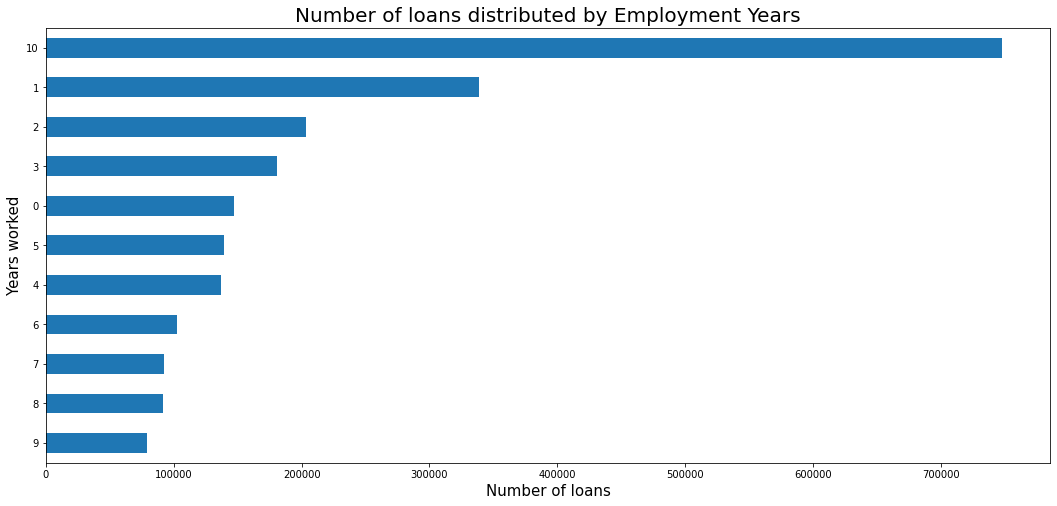

In [164]:
df4['emp_length'].fillna(value=0,inplace=True)

df4['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

df4['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

In [178]:
df5 = df4.drop(['emp_title'], axis = 1)

In [181]:
df5.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,10,MORTGAGE,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,10,MORTGAGE,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,10,MORTGAGE,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60,14.85,829.90,C,C5,10,MORTGAGE,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,3,MORTGAGE,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
